In [1]:
from zf_unet.zf_unet_224_model import ZF_UNET_224, dice_coef_loss, dice_coef

Using TensorFlow backend.


In [2]:
!ls

ISIC_melanoma              zf_unet
Segmentation results.ipynb zf_unet_224.h5


In [3]:
outpath = "../data/out/masks/"

In [4]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import colorsys
import random

In [5]:
from keras.optimizers import Adam

model = ZF_UNET_224()
model.load_weights("zf_unet_224.h5") # optional
optim = Adam()
model.compile(optimizer=optim, loss=dice_coef_loss, metrics=[dice_coef])




In [ ]:
def random_colors(N, bright=True):
    """
    Generate random colors.
    To get visually distinct colors, generate them in HSV space then
    convert to RGB.
    """
    brightness = 1.0 if bright else 0.7
    hsv = [(i / N, 1, brightness) for i in range(N)]
    colors = list(map(lambda c: colorsys.hsv_to_rgb(*c), hsv))
    random.shuffle(colors)
    return colors

In [ ]:
def apply_mask(image, mask, color, alpha=0.5):
    """Apply the given mask to the image.
    """
    image_new = np.copy(image)
    for c in range(3):
        image_new[:, :, c] = np.where(mask == 0 ,
                                  image[:, :, c]*
                                  (1 - alpha) + alpha * np.array(color[c]) * 255,
                                  image[:, :, c])
    return image_new

In [ ]:
#image_path = "../data/melanoma/0462.jpg"
image_path = "../data/melanoma/0491.jpg"
image = cv2.imread(image_path)
print(image.shape)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)#convert channels
plt.imshow(image)
plt.show()


image_gray = cv2.imread(image_path, 0)
laplacian = cv2.Laplacian(image_gray, cv2.CV_64F)
sobelx = cv2.Sobel(image_gray, cv2.CV_64F,1,0,ksize=5)
sobelx64f = cv2.Sobel(image_gray,cv2.CV_64F,1,0,ksize=5)
sobelx8u = cv2.Sobel(image_gray,cv2.CV_8U,1,0,ksize=5)
sobelx64f = cv2.Sobel(sobelx8u,cv2.CV_64F,1,0,ksize=5)
plt.imshow(sobelx64f, cmap = 'gray')
plt.show()


img = Image.fromarray(image)
img_res = img.resize((224, 224), Image.ANTIALIAS)
image = np.array(img_res)
image = image.reshape(1, 224,224,3)
y_pred = model.predict(image)
plt.imshow(y_pred.reshape((224,224)), cmap='gray')
plt.show()


mask = y_pred.reshape((224,224)).astype(int) ==1
image_reshape = image.reshape((224,224,3))
mask = mask.astype(int)

N = mask.shape[0]
colors = random_colors(N)
plt.imshow(apply_mask(image_reshape, mask, colors[1]))

In [ ]:
#image_path = "../data/benign/2916.jpg"
image_path = "../data/benign/2901.jpg"
image = cv2.imread(image_path)
print(image.shape)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)#convert channels
plt.imshow(image)
plt.show()

#plot prediction
img = Image.fromarray(image)
img_res = img.resize((224, 224), Image.ANTIALIAS)
image = np.array(img_res)
image = image.reshape(1, 224,224,3)
y_pred = model.predict(image)
plt.imshow(y_pred.reshape((224,224)), cmap='gray')
plt.show()

# plot mask
mask = y_pred.reshape((224,224)).astype(int) ==1
image_reshape = image.reshape((224,224,3))
mask = mask.astype(int)
N = mask.shape[0]
colors = random_colors(N)
plt.imshow(apply_mask(image_reshape, mask, colors[1]))

# save mask into the folder

In [ ]:
#for 500 images in melanom and 500 images in belgum save masks

In [7]:
from tqdm import tqdm

In [8]:
melanoma_path = "../data/melanoma/"
benign_path = "../data/benign/"


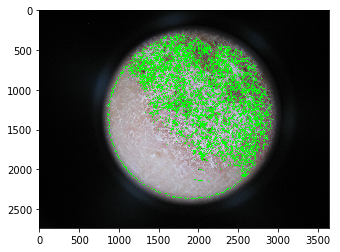

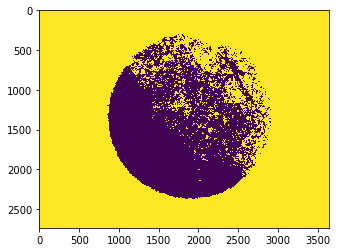

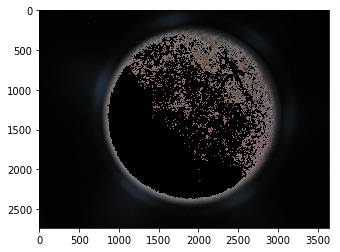

In [9]:
#image_path = benign_path + "0167.jpg"
image_path = benign_path + "2996.jpg"
image_original = cv2.imread(image_path)
im = cv2.imread(image_path)
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(im, contours, -1, (0,255,0), 3)
image_ = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(image_, cmap='gray')
plt.show()




mask = np.ones(im.shape[:2], dtype="uint8") * 255

# Draw the contours on the mask
cv2.drawContours(mask, contours, -1, 0, -1)
plt.imshow(mask)
plt.show()



# remove the contours from the image and show the resulting images
img = cv2.bitwise_and(image_original, image_original, mask=mask)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [10]:
image_original[0][0][0] #then skip

3

In [11]:
image_original.shape

(2736, 3648, 3)

In [12]:
from tqdm import tqdm

In [13]:
#benign_path

In [14]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(benign_path) if isfile(join(benign_path, f))]

In [15]:
benign_pathout = "../data/benign_mask/" 

In [ ]:
#from multiprocessing import Pool

In [16]:
# def imap_unordered_bar(func, args, n_processes = 2):
#     p = Pool(n_processes)
#     res_list = []
#     with tqdm(total = len(args)) as pbar:
#         for i, res in tqdm(enumerate(p.imap_unordered(func, args))):
#             pbar.update()
#             res_list.append(res)
#     pbar.close()
#     p.close()
#     p.join()
#     return res_list

In [ ]:
#result = imap_unordered_bar(prepare_data, onlyfiles[:10])

In [22]:
for file in tqdm(onlyfiles):
    prepare_data(file)


  1%|          | 35/3052 [00:06<08:51,  5.68it/s]
Exception in thread Thread-5:
Traceback (most recent call last):
  File "/anaconda2/envs/untitled2/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/anaconda2/envs/untitled2/lib/python3.6/site-packages/tqdm/_monitor.py", line 63, in run
    for instance in self.tqdm_cls._instances:
  File "/anaconda2/envs/untitled2/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

100%|██████████| 3052/3052 [11:14<00:00,  4.53it/s]


In [29]:


# for file in tqdm(onlyfiles):
#     #image_path = benign_path + "0167.jpg"
    
def prepare_data(pathin, file, pathout):
    image_path = pathin + file
    image_original = cv2.imread(image_path)
    if image_original is None:
        return
    if image_original[0][0][0]<100:
        return
    
    imgray = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(imgray, 127, 255, 0)
    im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)




    mask = np.ones(image_original.shape[:2], dtype="uint8") * 255
    cv2.drawContours(mask, contours, -1, 0, -1)



    # remove the contours from the image and show the resulting images
    img = cv2.bitwise_and(image_original, image_original, mask=mask)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cv2.imwrite(pathout + file, img)

In [30]:
melanoma_path = "../data/melanoma/"

In [31]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(melanoma_path) if isfile(join(melanoma_path, f))]

In [32]:
melanoma_pathout = "../data/melanoma_mask/"


for file in tqdm(onlyfiles):
    prepare_data(melanoma_path, file, melanoma_pathout)

100%|██████████| 2086/2086 [12:20<00:00,  2.82it/s]
